In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [11]:
df = pd.read_csv("/content/cleaned_in_vehicle_coupon_data.csv")
df.head()


,temperature,Bar,CoffeeHouse,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,destination_No Urgent Place,destination_Work,...,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),passanger_Friend(s),time_10PM,time_2PM,expiration_2h,maritalStatus_Single
0,55,4,4,0,1,0,0,1,True,False,...,True,False,False,False,True,False,False,True,False,False
1,80,4,4,0,1,0,0,0,True,False,...,True,False,True,False,False,True,False,False,True,False
2,80,4,4,0,1,1,0,1,True,False,...,True,True,False,False,False,True,False,False,True,False
3,80,4,4,0,1,1,0,0,True,False,...,True,False,True,False,False,True,False,True,True,False
4,80,4,4,0,1,1,0,0,True,False,...,True,False,True,False,False,True,False,True,False,False


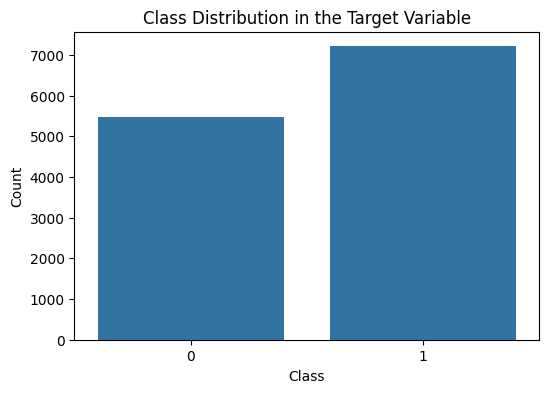

In [12]:
# CHECKING FOR CLASS IMBALANCE IN TARGET VARIABLE 'Y'

#VISUALISATION
plt.figure(figsize=(6,4))
sns.countplot(x=df['Y'])
plt.title("Class Distribution in the Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [13]:
# CHECKING RATIO OF DISTRIBUTION NUMERICALLY
class_counts = df['Y'].value_counts()
print("Class Distribution: \n", class_counts)


Class Distribution: 
 Y
1    7210
0    5474
Name: count, dtype: int64


In [14]:
# GENERALLY WE DON'T APPLY RESAMPLING TECHNIQUES IN THESE TYPE OF CASES
X = df.drop(columns=['Y'])
y = df['Y']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# TO BALANCE THE DATASET, LETS APPLY DIFFERENT RESAMPLING TECHNIQUES
# SMOTE(SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE) ==> GENERATING SYNTHETIC DATA POINTS
# FOR MINORITY CLASS TO INCREASE ITS REPRESENTATION
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE: ", Counter(y_train_smote))


Class Distribution After SMOTE:  Counter({1: 5768, 0: 5768})


In [19]:
#RANDOM UNDERSAMPLING (REMOVING INSTANCES FROM MAJORITY CLASS TO BALANCE THE DATA)
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("Class Distribution After Undersampling: ", Counter(y_train_under))


Class Distribution After Undersampling:  Counter({0: 4379, 1: 4379})


In [20]:
# NOW, SMOTE+ENN(HYBRID SAMPLING) #COMBINATION OF OVER AND UNDERSAMPLING THAT IMPROVES CLASS DISTRIBUTION
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE + ENN: ", Counter(y_train_smoteenn))


Class Distribution After SMOTE + ENN:  Counter({0: 2434, 1: 2130})


In [21]:
# COMPARING CLASSIFIERS' PERFORMANCE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Performance on Imbalanced Data:\n", classification_report(y_test, y_pred))


Performance on Imbalanced Data:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      1095
           1       0.70      0.72      0.71      1442

    accuracy                           0.67      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537



In [22]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test)
print("Performance on Balanced Data (SMOTE):\n", classification_report(y_test, y_pred_smote))


Performance on Balanced Data (SMOTE):
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      1095
           1       0.71      0.69      0.70      1442

    accuracy                           0.67      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537



In [23]:
rf_under = RandomForestClassifier(random_state=42)
rf_under.fit(X_train_under, y_train_under)

y_pred_under = rf_under.predict(X_test)
print("Performance on Balanced Data (Undersampling):\n", classification_report(y_test, y_pred_under))


Performance on Balanced Data (Undersampling):
               precision    recall  f1-score   support

           0       0.60      0.65      0.63      1095
           1       0.72      0.67      0.69      1442

    accuracy                           0.66      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.66      0.66      2537



In [24]:
rf_smoteenn = RandomForestClassifier(random_state=42)
rf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

y_pred_smoteenn = rf_smoteenn.predict(X_test)
print("Performance on Balanced Data (SMOTE + ENN):\n", classification_report(y_test, y_pred_smoteenn))


Performance on Balanced Data (SMOTE + ENN):
               precision    recall  f1-score   support

           0       0.65      0.69      0.67      1095
           1       0.75      0.72      0.73      1442

    accuracy                           0.70      2537
   macro avg       0.70      0.70      0.70      2537
weighted avg       0.71      0.70      0.70      2537



In [25]:
# SMOTE+ENN IS WORKING WELL BECAUSE IT PRESERVES NATURE OF DATA
balanced_df = pd.DataFrame(X_train_smoteenn, columns=X.columns)
balanced_df['target_variable'] = y_train_smoteenn
balanced_df.to_csv("balanced_in_vehicle_coupon_data.csv", index=False)
